# <font color="red">Algorithm Practice</font>

In [1]:
import random

# Generate a list of 10 random two-digit numbers
random_numbers = [random.randint(10, 99) for _ in range(10)]

print(random_numbers) #this random_numbers will be used as the unsorted array, which will be sorted in the algorithm

[84, 52, 97, 59, 73, 68, 79, 10, 92, 40]


# <font color="red">Insertion Sort</font>

In [2]:
A = random_numbers.copy()
n = len(A)

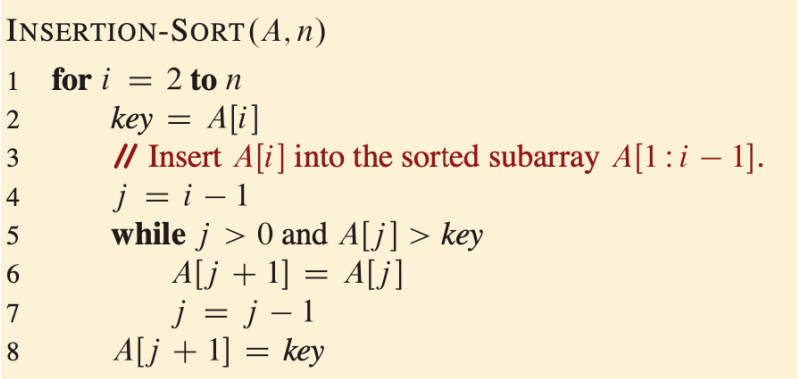

In [3]:
def insertionSort(A, n):
    for i in range(1, n): #in python index start with 0, so second index is 1
        key = A[i]
        j = i - 1
        while j >= 0 and A[j] > key: #as starting index is 0, we need to check equal or greater than
            A[j+1] = A[j]
            j = j - 1
        A[j+1] = key

In [4]:
insertionSort(A, n) # calling the function
A #checking the sorted array

[10, 40, 52, 59, 68, 73, 79, 84, 92, 97]

# <font color="red">Merge Sort</font>

In [5]:
A = random_numbers.copy()
r = len(A) - 1

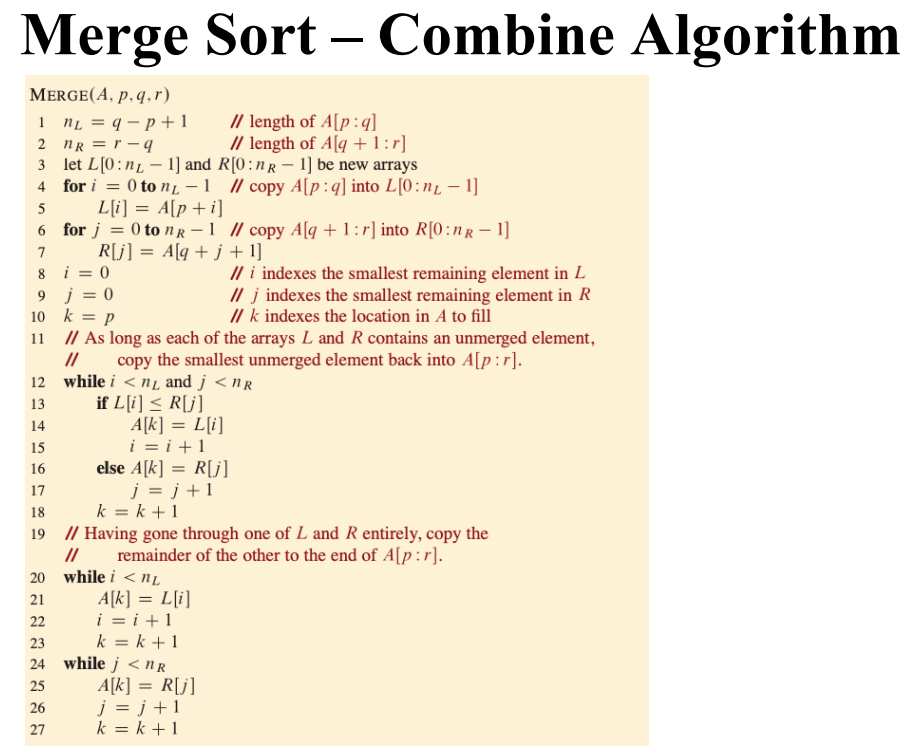

In [6]:
def merge(A, p, q, r):
    n_left = q - p + 1 #length of left subarray
    n_right = r - q #length of right subarray
    L = A[p : q + 1] #Copy Left array, elements from p to q
    R = A[q + 1 : r + 1]  #Copy Right array, elements from q+1 to r
    i = j = 0 #initiate i and j for loop iteration
    k = p
    while i < n_left and j < n_right: #if any subarray end, it will terminate
        if L[i] <= R[j]:
            A[k] = L[i]
            i = i + 1
        else:
            A[k] = R[j]
            j = j + 1
        k = k + 1
    while i < n_left: #copy rest of the left array
        A[k] = L[i]
        i = i + 1
        k = k + 1
    while j < n_right: #copy rest of the right array
        A[k] = R[j]
        j = j + 1
        k = k + 1

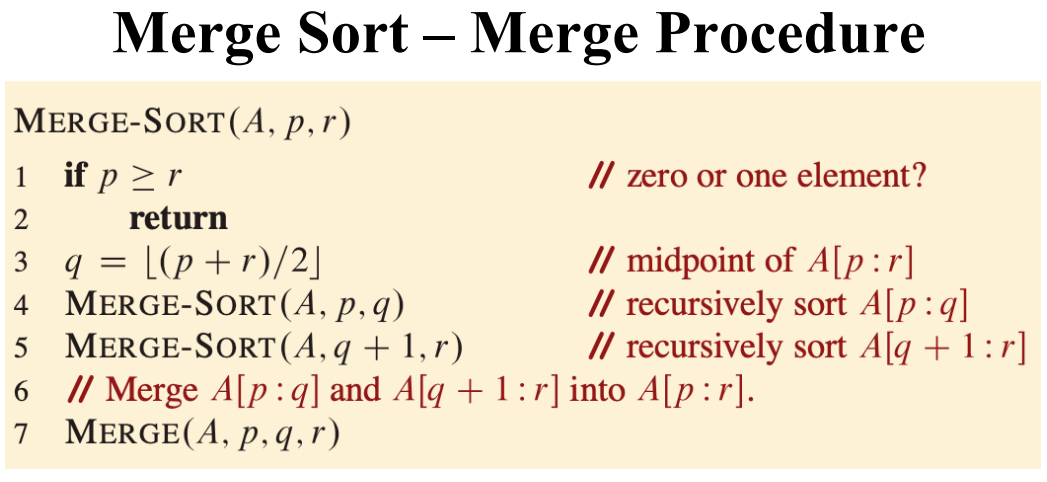

In [7]:
def mergeSort(A, p, r):
    if p >= r: #if starting index and end index is same then, recursive call will end
        return
    q = (p + r) // 2 #calculating the mid point
    mergeSort(A, p, q) #recursively call left subarray
    mergeSort(A, q+1, r) #recursively call right subarray
    merge(A, p, q, r) #merging two sorted subarray

In [8]:
mergeSort(A, 0, r) #calling the function for sort
A #printing and checking the sorted array

[10, 40, 52, 59, 68, 73, 79, 84, 92, 97]

# <font color="red">Heap Sort</font>

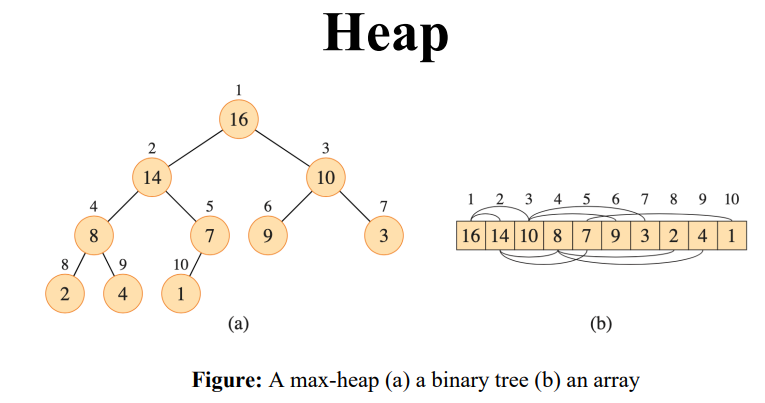

In [9]:
A = random_numbers.copy()
n = len(A)
heapSize = n #global variable will be use for a function

In [10]:
#some auxilary function
def parent(i): #finding the parent
    return (i - 1) // 2 #as index start with 0, thats why formula changed

def left(i):
    return 2 * i + 1 #same happend here

def right(i):
    return 2 * i + 2 #for getting correct number adding one extra number

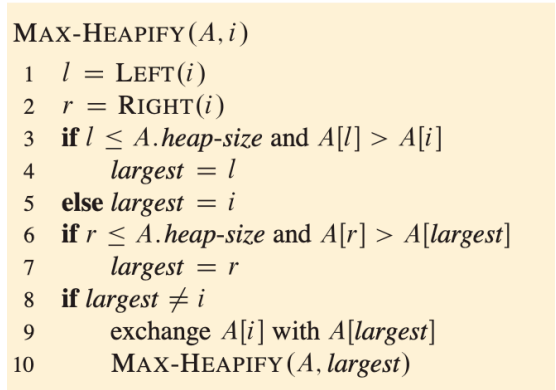

In [11]:
def maxHeapify(A, i): #sort the array in max heap
    global heapSize #global varibale ready to use
    l = left(i)
    r = right(i)
    if l < heapSize and A[l] > A[i]:
        largest = l
    else:
        largest = i
    if r < heapSize and A[r] > A[largest]:
        largest = r
    if largest != i:
        A[i], A[largest] = A[largest], A[i] #exchanging two variable using python, easy
        maxHeapify(A, largest) #recursively call

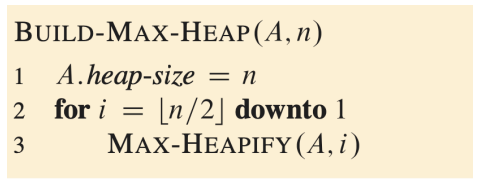

In [12]:
def buildMaxHeap(A, n):
    for i in range(n // 2 - 1, -1, -1): #downward for loop, every time reduce by -1
        maxHeapify(A, i)

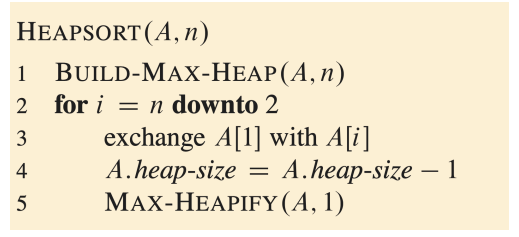

In [13]:
def heapSort(A, n):
    global heapSize #for using global variabel
    heapSize = n
    buildMaxHeap(A, n)
    for i in range (n-1, 0, -1):
        A[0], A[i] = A[i], A[0]
        heapSize = heapSize - 1
        maxHeapify(A, 0)

In [14]:
heapSort(A, n) #calling the funtion
A #checking

[10, 40, 52, 59, 68, 73, 79, 84, 92, 97]

# <font color="red">Priority Queue</font>

# <font color="red">Knapsack Algorithm - Dynamic Iterative - Bottom Up</font>

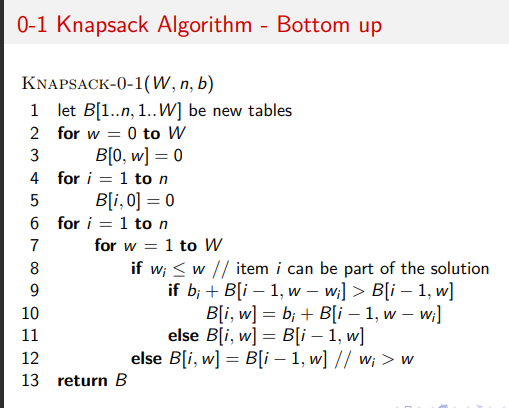

In [1]:
def knapsack_01(W, weights, values):
    n = len(weights)
    B = [[0] * (W + 1) for _ in range(n + 1)]

    for w in range(W + 1):
        B[0][w] = 0

    for i in range(1, n + 1):
        B[i][0] = 0

    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if weights[i - 1] <= w:
                if values[i - 1] + B[i - 1][w - weights[i - 1]] > B[i - 1][w]:
                    B[i][w] = values[i - 1] + B[i - 1][w - weights[i - 1]]
                else:
                    B[i][w] = B[i - 1][w]
            else:
                B[i][w] = B[i - 1][w]

    return B

In [20]:
weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]

In [21]:
%%time
W = 5
B = knapsack_01(W, weights, values)
B

CPU times: total: 0 ns
Wall time: 0 ns


[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 3, 3, 3],
 [0, 0, 3, 4, 4, 7],
 [0, 0, 3, 4, 5, 7],
 [0, 0, 3, 4, 5, 7]]

In [22]:
print("Max Possible Value: ", B[len(weights)-1][W])

Max Possible Value:  7


## <font color="red">Modified Knapsack - Space Optimization</font>

In [30]:
def knapsack_01_Space_Optimized(W, weights, values):
    n = len(weights)
    B = [[0] * (W + 1) for _ in range(2)]

    for w in range(W + 1):
        B[0][w] = 0

    for i in range(2):
        B[i][0] = 0

    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if weights[i - 1] <= w:
                if values[i - 1] + B[0][w - weights[i - 1]] > B[0][w]:
                    B[1][w] = values[i - 1] + B[0][w - weights[i - 1]]
                else:
                    B[1][w] = B[0][w]
            else:
                B[1][w] = B[0][w]
        for index in range(W + 1):
            B[0][index] = B[1][index]

    return B

In [31]:
%%time
W = 5
B = knapsack_01_Space_Optimized(W, weights, values)
B

CPU times: total: 0 ns
Wall time: 0 ns


[[0, 0, 3, 4, 5, 7], [0, 0, 3, 4, 5, 7]]

In [32]:
print("Max Possible Value: ", B[1][W])

Max Possible Value:  7
